# <center>Hierarchical Clustering with Python and Scikit-Learn</center>

## 1. Role of Dendrograms for Hierarchical Clustering

In the last section, we said that once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points. Let's see how it's actually done.

Suppose we have a collection of data points represented by a `numpy` array as follows:

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

Let's plot the above data points.

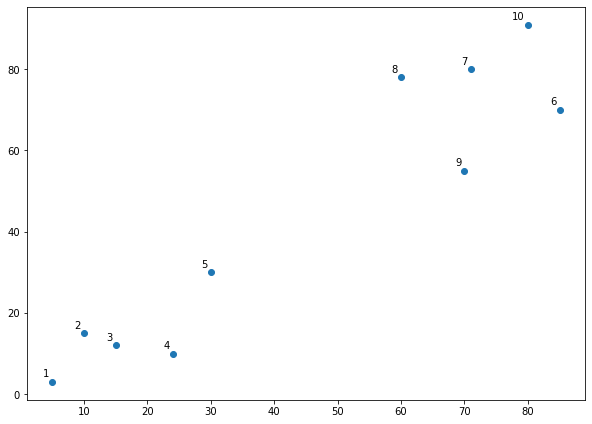

In [2]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

The script above draws the data points in the `X` numpy array and label data points from 1 to 10. 

Let's name the above plot as Graph1. It can be seen from the naked eye that the data points form **two clusters**: 

first at the bottom left consisting of points 1-5 while second at the top right consisting of points 6-10.

However, in the real world, we may have thousands of data points in many more than 2 dimensions. In that case it would not be possible to spot clusters with the naked eye. 

This is why clustering algorithms have been developed.

Let's draw the dendrograms for our data points. We will use the `scipy` library for that purpose:

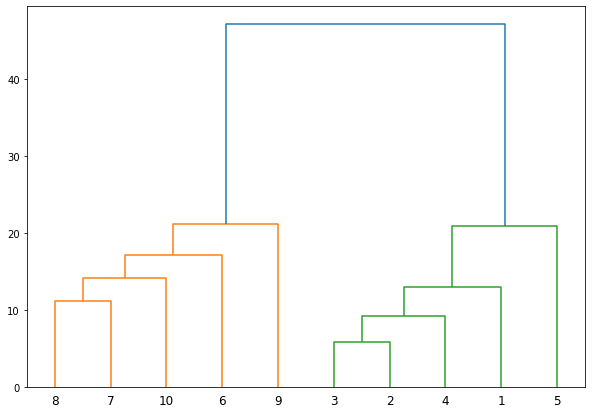

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance.

The vertical height of the dendogram shows the Euclidean distances between points. From the above figure, it can be seen that Euclidean distance between points 8 and 7 is greater than the distance between point 2 and 3.

Once one big cluster is formed,  a horizontal line is drawn.

The number of vertical lines this newly created horizontal line passes is equal to number of clusters. 

Take a look at the following plot: